In [23]:
#Cette fonction arrondit à l'unité chaque élément de la liste l
def transform_list(l):
    list = []
    for i in l:
        list.append(round(i,0))
    return list
#Cette fonction returne la valeur de y pour un x donné, pour une fonction donnée
def get_y(function,l,x):
    f = function.tolist()
    xpos = l.index(x)
    y = f[xpos]
    return y    

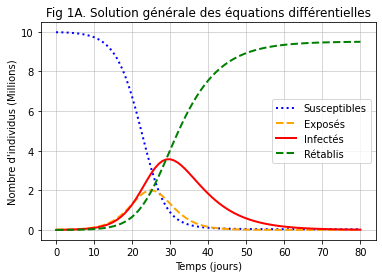

In [24]:
#Résolution des équations différentielles du modèle SEIR
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
N = 10
def SEIR_Model (x,t):
    l = 0
    m = 0
    a = 0.006
    b = 0.75
    g = 1/8
    e = 1/3
    S = x[0]
    E = x[1]
    I = x[2]
    R = x[3]
    dS_dt = l - m*S - b*S*(I/N)
    dE_dt = b*S*(I/N) - (m + e)*E
    dI_dt = e*E - (g + m + a)*I
    dR_dt = g*I - m*R
    dD_dt = - (dS_dt + dE_dt + dI_dt + dR_dt)
    return [dS_dt,dE_dt,dI_dt,dR_dt,dD_dt]
x_0 = [9.979999,0.02,1e-6,0,0]
t = transform_list(np.linspace(0,80,81).tolist())
x = odeint(SEIR_Model,x_0,t)
S = x[:,0]
E = x[:,1]
I = x[:,2]
R = x[:,3]
D = x[:,4]

plt.title("Fig 1A. Solution générale des équations différentielles")
plt.plot(t,S,ls='dotted',linewidth=2,markersize=1,c='blue',label='Susceptibles')
plt.plot(t,E,ls='dashed',linewidth=2,markersize=1,c='orange',label='Exposés')
plt.plot(t,I,ls='solid',linewidth=2,markersize=1,c='red',label='Infectés')
plt.plot(t,R,ls='dashed',linewidth=2,markersize=1,c='green',label= 'Rétablis')
plt.xlabel("Temps (jours)")
plt.ylabel("Nombre d'individus (Millions)")
plt.legend()
plt.grid(linewidth=0.5)
plt.savefig('Figure1.png')
plt.show()



In [25]:
#Commentaire
print("Le nombre d'individus susceptibles au jour 0 est :", get_y(S,t,0), " millions")
print("Le nombre d'individus exposés au 25ème jour est :", get_y(E,t,25), " millions")
print("Le nombre d'individus rétablis au 80ème jour est :", get_y(R,t,80), " millions")
ymax = max(I.tolist())
xpos = I.tolist().index(ymax)
xmax = t[xpos]
print ("Le pic de l'épidemie est atteint le ",round(xmax,0), "ème jour avec ", round(ymax,2) ," millions d'individus infectés")

Le nombre d'individus susceptibles au jour 0 est : 9.979999  millions
Le nombre d'individus exposés au 25ème jour est : 2.0024479192750473  millions
Le nombre d'individus rétablis au 80ème jour est : 9.497189306178894  millions
Le pic de l'épidemie est atteint le  30.0 ème jour avec  3.57  millions d'individus infectés


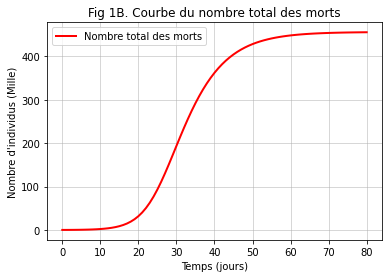

Le nombre total des nombres des morts au 40ème jour est  362.307082880629  mille morts


In [26]:
#Evolution du nombre total des morts
plt.title("Fig 1B. Courbe du nombre total des morts")
plt.xlabel("Temps (jours)")
plt.ylabel("Nombre d'individus (Mille)")

plt.plot(t,1000*D,ls='solid',linewidth=2,markersize=1,color='red',label='Nombre total des morts')
plt.legend()
plt.grid(linewidth=0.5)
plt.savefig('Figure2.png')
plt.show()
print("Le nombre total des nombres des morts au 40ème jour est ",1000*get_y(D,t,40), " mille morts")

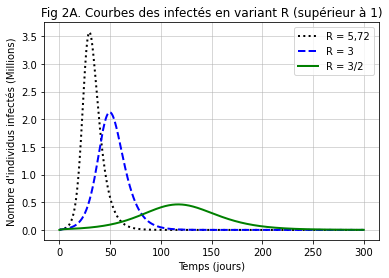

In [27]:
#Modèle en faisant varier R (supérieur à 1)
def SEIR_Model2 (x,t,p):
    l = 0
    m = 0
    a = 0.006
    b = p
    g = 1/8
    e = 1/3
    N = 10
    S = x[0]
    E = x[1]
    I = x[2]
    R = x[3]
    dS_dt = l - m*S - b*S*(I/N)
    dE_dt = b*S*(I/N) - (m + e)*E
    dI_dt = e*E - (g + m + a)*I
    dR_dt = g*I - m*R
    dD_dt = - (dS_dt + dE_dt + dI_dt + dR_dt)
    return [dS_dt,dE_dt,dI_dt,dR_dt,dD_dt]
x_0 = [9.979999,0.02,1e-6,0,0]
t = np.linspace(0,300,1000)
x1 = odeint(SEIR_Model2,x_0,t,(0.75,))
x2 = odeint(SEIR_Model2,x_0,t,(0.393,))
x3 = odeint(SEIR_Model2,x_0,t,(0.1965,))
I1 = x1[:,2]
I2 = x2[:,2]
I3 = x3[:,2]
plt.title ("Fig 2A. Courbes des infectés en variant R (supérieur à 1)")
plt.xlabel("Temps (jours)")
plt.ylabel("Nombre d'individus infectés (Millions)")
plt.plot(t,I1,ls='dotted',linewidth=2,markersize=1,color='black',label='R = 5,72')
plt.plot(t,I2,ls='dashed',linewidth=2,markersize=1,color='blue',label='R = 3')
plt.plot(t,I3,ls='solid',linewidth=2,markersize=1,color='green',label='R = 3/2')
plt.xticks(range(0,301,50))
plt.grid(linewidth=0.5)
plt.legend()
plt.savefig('Figure3.png')
plt.show()


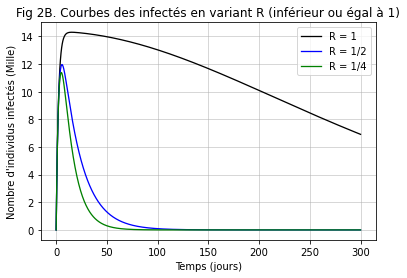

In [28]:
#Modèle en faisant varier R (inférieur ou égal à 1)
x_0 = [9.979999,0.02,1e-6,0,0]
t = np.linspace(0,300,1000)
x4 = odeint(SEIR_Model2,x_0,t,(0.131,))
x5 = odeint(SEIR_Model2,x_0,t,(0.0655,))
x6 = odeint(SEIR_Model2,x_0,t,(0.03275,))
I4 = x4[:,2]
I5 = x5[:,2]
I6 = x6[:,2]
plt.title ("Fig 2B. Courbes des infectés en variant R (inférieur ou égal à 1)")
plt.xlabel("Temps (jours)")
plt.ylabel("Nombre d'individus infectés (Mille)")
plt.plot(t,1000*I4,ls='solid',linewidth=1.3,markersize=1,color='black',label='R = 1')
plt.plot(t,1000*I5,ls='solid',linewidth=1.3,markersize=1,color='blue',label='R = 1/2')
plt.plot(t,1000*I6,ls='solid',linewidth=1.3,markersize=1,color='green',label='R = 1/4')
plt.grid(linewidth=0.5)
plt.legend()
plt.savefig('Figure4.png')
plt.show()

In [29]:
t_list = t.tolist()
All_I = [I1.tolist(),I2.tolist(), I3.tolist(),I4.tolist(),I5.tolist(),I6.tolist()]
jours = []
nums = []
R_values = [5.72,3,1.5,1,0.5,0.25]
for I in All_I:
    ymax = max(I)
    xpos = I.index(ymax)
    xmax = t_list[xpos]
    nums.append(ymax)
    jours.append(xmax)
for i, j, k in zip(jours, nums , R_values):
    print ("Le pic de l'épidemie est atteint le ",round(i,0), " ème jour avec ", round(j,5) ," millions d'individus infectés pour R =",k)

Le pic de l'épidemie est atteint le  29.0  ème jour avec  3.57174  millions d'individus infectés pour R = 5.72
Le pic de l'épidemie est atteint le  50.0  ème jour avec  2.12612  millions d'individus infectés pour R = 3
Le pic de l'épidemie est atteint le  117.0  ème jour avec  0.46111  millions d'individus infectés pour R = 1.5
Le pic de l'épidemie est atteint le  15.0  ème jour avec  0.0143  millions d'individus infectés pour R = 1
Le pic de l'épidemie est atteint le  6.0  ème jour avec  0.01197  millions d'individus infectés pour R = 0.5
Le pic de l'épidemie est atteint le  5.0  ème jour avec  0.01139  millions d'individus infectés pour R = 0.25


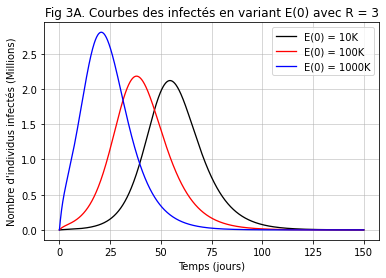

In [30]:
#Modèle en faisant varier le nombre initial des exposés(R = 3)
def SEIR_Model3 (x,t,p):
    l = 0
    m = 0
    a = 0.006
    b = p
    g = 1/8
    e = 1/3
    N = 10
    S = x[0]
    E = x[1]
    I = x[2]
    R = x[3]
    dS_dt = l - m*S - b*S*(I/N)
    dE_dt = b*S*(I/N) - (m + e)*E
    dI_dt = e*E - (g + m + a)*I
    dR_dt = g*I - m*R
    return [dS_dt,dE_dt,dI_dt,dR_dt]
x_1 = [9.979999,0.01,1e-6,0]
x_2 = [9.979999,0.1,1e-6,0]
x_3 = [9.979999,1,1e-6,0]
t = np.linspace(0,150,1000)
x11 = odeint(SEIR_Model3,x_1,t,(0.393,))
x12 = odeint(SEIR_Model3,x_2,t,(0.393,))
x13 = odeint(SEIR_Model3,x_3,t,(0.393,))
I11 = x11[:,2]
I12 = x12[:,2]
I13 = x13[:,2]
plt.title("Fig 3A. Courbes des infectés en variant E(0) avec R = 3")
plt.xlabel("Temps (jours)")
plt.ylabel("Nombre d'individus infectés (Millions)")
plt.plot(t,I11,ls='solid',linewidth=1.3,markersize=1,color='black',label="E(0) = 10K")
plt.plot(t,I12,ls='solid',linewidth=1.3,markersize=1,color='red',label="E(0) = 100K")
plt.plot(t,I13,ls='solid',linewidth=1.3,markersize=1,color='blue',label="E(0) = 1000K")
plt.legend()
plt.grid(linewidth=0.5)
plt.xticks(range(0,151,25))
plt.savefig('Figure5.png')
plt.show()

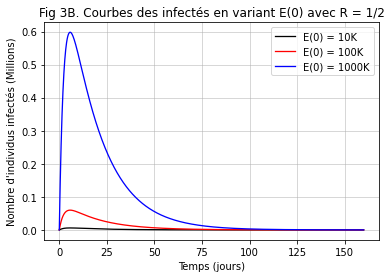

In [31]:
#Modèle en faisant varier le nombre initial des exposés(R = 1/2)
x_4 = [9.979999,0.01,1e-6,0]
x_5 = [9.979999,0.1,1e-6,0]
x_6 = [9.979999,1,1e-6,0]
t = np.linspace(0,160,1000)
x14 = odeint(SEIR_Model3,x_1,t,(0.0655,))
x15 = odeint(SEIR_Model3,x_2,t,(0.0655,))
x16 = odeint(SEIR_Model3,x_3,t,(0.0655,))
I14 = x14[:,2]
I15 = x15[:,2]
I16 = x16[:,2]
plt.title("Fig 3B. Courbes des infectés en variant E(0) avec R = 1/2")
plt.xlabel("Temps (jours)")
plt.ylabel("Nombre d'individus infectés (Millions)")
plt.plot(t,I14,ls='solid',linewidth=1.3,markersize=1,color='black',label="E(0) = 10K")
plt.plot(t,I15,ls='solid',linewidth=1.3,markersize=1,color='red',label="E(0) = 100K")
plt.plot(t,I16,ls='solid',linewidth=1.3,markersize=1,color='blue',label="E(0) = 1000K")
plt.legend()
plt.grid(linewidth=0.5)
plt.xticks(range(0,151,25))
plt.savefig('Figure6.png')
plt.show()

In [32]:
t_list = t
All_I = [I11.tolist(),I12.tolist(), I13.tolist(),I14.tolist(),I15.tolist(),I16.tolist()]
jours = []
nums = []
E_values = ["10K","100K","1000K","10K","100K","1000K"]
for I in All_I:
    ymax = max(I)
    xpos = I.index(ymax)
    xmax = t_list[xpos]
    nums.append(ymax)
    jours.append(xmax)
for i, j, k in zip(jours, nums , E_values):
    print ("Le pic de l'épidemie est atteint le ",round(i,0), " ème jour avec ", round(j,8) ," millions d'individus infectés pour E(0) = "+ k)

Le pic de l'épidemie est atteint le  58.0  ème jour avec  2.11918876  millions d'individus infectés pour E(0) = 10K
Le pic de l'épidemie est atteint le  41.0  ème jour avec  2.18175543  millions d'individus infectés pour E(0) = 100K
Le pic de l'épidemie est atteint le  22.0  ème jour avec  2.80468091  millions d'individus infectés pour E(0) = 1000K
Le pic de l'épidemie est atteint le  6.0  ème jour avec  0.00598297  millions d'individus infectés pour E(0) = 10K
Le pic de l'épidemie est atteint le  6.0  ème jour avec  0.05982051  millions d'individus infectés pour E(0) = 100K
Le pic de l'épidemie est atteint le  6.0  ème jour avec  0.59780967  millions d'individus infectés pour E(0) = 1000K


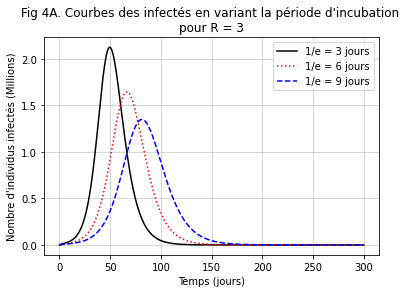

In [33]:
#Modèle en variant la période d'incubation e pour R = 3
def SEIR_Model4 (x,t,p,q):
    l = 0
    m = 0
    a = 0.006
    b = p
    g = 1/8
    e = q
    N = 10
    S = x[0]
    E = x[1]
    I = x[2]
    R = x[3]
    dS_dt = l - m*S - b*S*(I/N)
    dE_dt = b*S*(I/N) - (m + e)*E
    dI_dt = e*E - (g + m + a)*I
    dR_dt = g*I - m*R
    return [dS_dt,dE_dt,dI_dt,dR_dt]
x_0 = [9.979999,0.02,1e-6,0]
tx = np.linspace(0,300,1000)
x21 = odeint(SEIR_Model4,x_0,tx,(0.393,1/3,))
x22 = odeint(SEIR_Model4,x_0,tx,(0.393,1/6,))
x23 = odeint(SEIR_Model4,x_0,tx,(0.393,1/9,))
I21 = x21[:,2]
I22 = x22[:,2]
I23 = x23[:,2]
plt.title("Fig 4A. Courbes des infectés en variant la période d'incubation \npour R = 3")
plt.xlabel("Temps (jours)")
plt.ylabel("Nombre d'individus infectés (Millions)")
plt.plot(tx,I21,ls='solid',linewidth=1.5,markersize=1,color='black',label="1/e = 3 jours")
plt.plot(tx,I22,ls='dotted',linewidth=1.5,markersize=1,color='red',label="1/e = 6 jours")
plt.plot(tx,I23,ls='dashed',linewidth=1.5,markersize=1,color='blue',label="1/e = 9 jours")
plt.legend()
plt.grid(linewidth=0.5)
plt.savefig('Figure7.png')
plt.show()


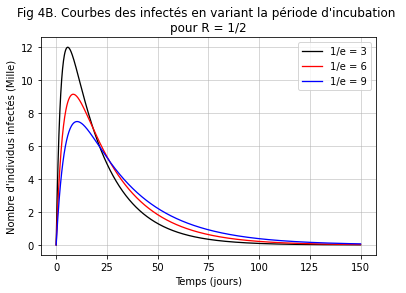

In [34]:
#Modèle en variant la période d'incubation e pour R = 1/2
plt.title("Fig 4B. Courbes des infectés en variant la période d'incubation \npour R = 1/2")
plt.xlabel("Temps (jours)")
plt.ylabel("Nombre d'individus infectés (Mille)")
t = np.linspace(0,150,1000)
x24 = odeint(SEIR_Model4,x_0,t,(0.0655,1/3,))
x25 = odeint(SEIR_Model4,x_0,t,(0.0655,1/6,))
x26 = odeint(SEIR_Model4,x_0,t,(0.0655,1/9,))
I24 = x24[:,2]
I25 = x25[:,2]
I26 = x26[:,2]
plt.plot(t,1000*I24,ls='solid',linewidth=1.3,markersize=1,color='black',label="1/e = 3")
plt.plot(t,1000*I25,ls='solid',linewidth=1.3,markersize=1,color='red',label="1/e = 6")
plt.plot(t,1000*I26,ls='solid',linewidth=1.3,markersize=1,color='blue',label="1/e = 9")
plt.grid(linewidth=0.5)
plt.legend()
plt.xticks(range(0,151,25))
plt.savefig('Figure8.png')
plt.show()

In [35]:
All_I = [I21.tolist(),I22.tolist(), I23.tolist()]
jours = []
nums = []
t_list = tx.tolist()
E_values = ["1/3","1/6","1/9"]
for I in All_I:
    ymax = max(I)
    xpos = I.index(ymax)
    xmax = t_list[xpos]
    nums.append(ymax)
    jours.append(xmax)
for i, j, k in zip(jours, nums , E_values):
    print ("Le pic de l'épidemie est atteint le ",round(i,0), " ème jour avec ", round(j,8) ," millions d'individus infectés pour e = "+ k)

Le pic de l'épidemie est atteint le  50.0  ème jour avec  2.12612216  millions d'individus infectés pour e = 1/3
Le pic de l'épidemie est atteint le  66.0  ème jour avec  1.64739127  millions d'individus infectés pour e = 1/6
Le pic de l'épidemie est atteint le  81.0  ème jour avec  1.34988599  millions d'individus infectés pour e = 1/9


In [36]:
All_I = [I24.tolist(),I25.tolist(), I26.tolist()]
jours = []
nums = []
t_list = t.tolist()
E_values = ["1/3","1/6","1/9"]
for I in All_I:
    ymax = max(I)
    xpos = I.index(ymax)
    xmax = t_list[xpos]
    nums.append(ymax)
    jours.append(xmax)
for i, j, k in zip(jours, nums , E_values):
    print ("Le pic de l'épidemie est atteint le ",round(i,0), " ème jour avec ", round(j,8) ," millions d'individus infectés pour e = "+ k)

Le pic de l'épidemie est atteint le  6.0  ème jour avec  0.01196564  millions d'individus infectés pour e = 1/3
Le pic de l'épidemie est atteint le  8.0  ème jour avec  0.00912107  millions d'individus infectés pour e = 1/6
Le pic de l'épidemie est atteint le  10.0  ème jour avec  0.00746889  millions d'individus infectés pour e = 1/9


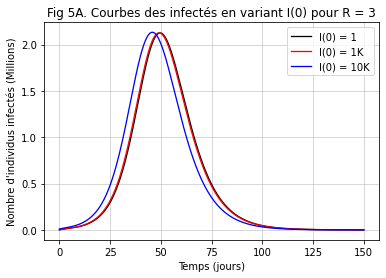

In [37]:
#Modèle en faisant varier le nombre initial des infectés(R = 3)
x_4 = [9.979999,0.02,1e-6,0,0]
x_5 = [9.979999,0.02,1e-3,0,0]
x_6 = [9.979999,0.02,1e-2,0,0]
t = np.linspace(0,150,1000)
x31 = odeint(SEIR_Model2,x_4,t,(0.393,))
x32 = odeint(SEIR_Model2,x_5,t,(0.393,))
x33 = odeint(SEIR_Model2,x_6,t,(0.393,))
I31 = x31[:,2]
I32 = x32[:,2]
I33 = x33[:,2]
plt.title("Fig 5A. Courbes des infectés en variant I(0) pour R = 3")
plt.xlabel("Temps (jours)")
plt.ylabel("Nombre d'individus infectés (Millions)")
plt.plot(t,I31,ls='solid',linewidth=1.3,markersize=1,color='black',label="I(0) = 1")
plt.plot(t,I32,ls='solid',linewidth=1.3,markersize=1,color='red',label="I(0) = 1K")
plt.plot(t,I33,ls='solid',linewidth=1.3,markersize=1,color='blue',label="I(0) = 10K")
plt.legend()
plt.xticks(range(0,151,25))
plt.grid(linewidth=0.5)
plt.savefig('Figure9.png')
plt.show()


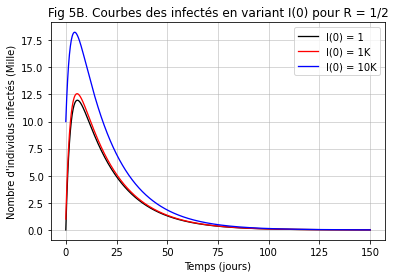

In [38]:
#Modèle en faisant varier le nombre initial des infectés(R = 1/2)
x_4 = [9.979999,0.02,1e-6,0,0]
x_5 = [9.979999,0.02,1e-3,0,0]
x_6 = [9.979999,0.02,1e-2,0,0]
t = np.linspace(0,150,1000)
x34 = odeint(SEIR_Model2,x_4,t,(0.0655,))
x35 = odeint(SEIR_Model2,x_5,t,(0.0655,))
x36 = odeint(SEIR_Model2,x_6,t,(0.0655,))
I34 = x34[:,2]
I35 = x35[:,2]
I36 = x36[:,2]
plt.title("Fig 5B. Courbes des infectés en variant I(0) pour R = 1/2")
plt.xlabel("Temps (jours)")
plt.ylabel("Nombre d'individus infectés (Mille)")
plt.plot(t,1000*I34,ls='solid',linewidth=1.3,markersize=1,c='black',label="I(0) = 1")
plt.plot(t,1000*I35,ls='solid',linewidth=1.3,markersize=1,c='red',label="I(0) = 1K")
plt.plot(t,1000*I36,ls='solid',linewidth=1.3,markersize=1,c='blue',label="I(0) = 10K")
plt.legend()
plt.grid(linewidth=0.5)
plt.xticks(range(0,151,25))
plt.savefig('Figure10.png')
plt.show()


In [39]:
t_list = t.tolist()
All_I = [I31.tolist(),I32.tolist(), I33.tolist(),I34.tolist(),I35.tolist(),I36.tolist()]
jours = []
nums = []
I_values = ["1","1K","10K","1","1K","10K"]
for I in All_I:
    ymax = max(I)
    xpos = I.index(ymax)
    xmax = t_list[xpos]
    nums.append(ymax)
    jours.append(xmax)
for i, j, k in zip(jours, nums , I_values):
    print ("Le pic de l'épidemie est atteint le ",round(i,0), " ème jour avec ", round(j,8) ," millions d'individus infectés pour I(0) = "+ k)

Le pic de l'épidemie est atteint le  50.0  ème jour avec  2.12612216  millions d'individus infectés pour I(0) = 1
Le pic de l'épidemie est atteint le  49.0  ème jour avec  2.12683642  millions d'individus infectés pour I(0) = 1K
Le pic de l'épidemie est atteint le  46.0  ème jour avec  2.13309616  millions d'individus infectés pour I(0) = 10K
Le pic de l'épidemie est atteint le  6.0  ème jour avec  0.01196564  millions d'individus infectés pour I(0) = 1
Le pic de l'épidemie est atteint le  6.0  ème jour avec  0.01256621  millions d'individus infectés pour I(0) = 1K
Le pic de l'épidemie est atteint le  4.0  ème jour avec  0.01823533  millions d'individus infectés pour I(0) = 10K


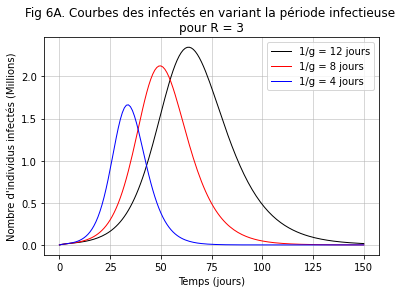

In [40]:
#Modèle en variant la période infectieuse g pour R = 3
def SEIR_Model5 (x,t,p,q):
    l = 0
    m = 0
    a = 0.006
    b = p
    g = q
    e = 1/3
    N = 10
    S = x[0]
    E = x[1]
    I = x[2]
    R = x[3]
    dS_dt = l - m*S - b*S*(I/N)
    dE_dt = b*S*(I/N) - (m + e)*E
    dI_dt = e*E - (g + m + a)*I
    dR_dt = g*I - m*R
    return [dS_dt,dE_dt,dI_dt,dR_dt]
x_0 = [9.979999,0.02,1e-6,0]
t = transform_list(np.linspace(0,150,151).tolist())
x41 = odeint(SEIR_Model5,x_0,t,(0.268,1/12,))
x42 = odeint(SEIR_Model5,x_0,t,(0.393,1/8,))
x43 = odeint(SEIR_Model5,x_0,t,(0.768,1/4,))
I41 = x41[:,2]
I42 = x42[:,2]
I43 = x43[:,2]
plt.title("Fig 6A. Courbes des infectés en variant la période infectieuse \npour R = 3")
plt.xlabel("Temps (jours)")
plt.ylabel("Nombre d'individus infectés (Millions)")
plt.plot(t,I41,ls='solid',linewidth=1.,markersize=1,color='black',label="1/g = 12 jours")
plt.plot(t,I42,ls='solid',linewidth=1.,markersize=1,color='red',label="1/g = 8 jours")
plt.plot(t,I43,ls='solid',linewidth=1.,markersize=1,color='blue',label="1/g = 4 jours")
plt.legend()
plt.grid(linewidth=0.5)
plt.xticks(range(0,151,25))
plt.savefig('Figure11.png')
plt.show()


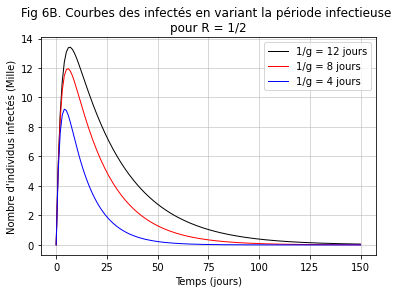

In [41]:
#Modèle en variant la période infectieuse g pour R = 1/2
x_0 = [9.979999,0.02,1e-6,0]
t = transform_list(np.linspace(0,150,151).tolist())
x44 = odeint(SEIR_Model5,x_0,t,(67/1500,1/12,))
x45 = odeint(SEIR_Model5,x_0,t,(0.0655,1/8,))
x46 = odeint(SEIR_Model5,x_0,t,(0.128,1/4,))
I44 = x44[:,2]
I45 = x45[:,2]
I46 = x46[:,2]
plt.title("Fig 6B. Courbes des infectés en variant la période infectieuse \npour R = 1/2")
plt.xlabel("Temps (jours)")
plt.ylabel("Nombre d'individus infectés (Mille)")
plt.plot(t,1000*I44,ls='solid',linewidth=1,markersize=1,color='black',label="1/g = 12 jours")
plt.plot(t,1000*I45,ls='solid',linewidth=1,markersize=1,color='red',label="1/g = 8 jours")
plt.plot(t,1000*I46,ls='solid',linewidth=1,markersize=1,color='blue',label="1/g = 4 jours")
plt.legend()
plt.grid(linewidth=0.5)
plt.xticks(range(0,151,25))
plt.savefig('Figure12.png')
plt.show()

In [42]:
t_list = t
All_I = [I41.tolist(),I42.tolist(), I43.tolist(),I44.tolist(),I45.tolist(),I46.tolist()]
jours = []
nums = []
G_values = [12,8,4,12,8,4]
for I in All_I:
    ymax = max(I)
    xpos = I.index(ymax)
    xmax = t_list[xpos]
    nums.append(ymax)
    jours.append(xmax)
for i, j, k in zip(jours, nums , G_values):
    print ("Le pic de l'épidemie est atteint le ",round(i,0), " ème jour avec ", round(j,5) ," millions d'individus infectés pour g =",k)

Le pic de l'épidemie est atteint le  64.0  ème jour avec  2.34643  millions d'individus infectés pour g = 12
Le pic de l'épidemie est atteint le  50.0  ème jour avec  2.12496  millions d'individus infectés pour g = 8
Le pic de l'épidemie est atteint le  34.0  ème jour avec  1.66282  millions d'individus infectés pour g = 4
Le pic de l'épidemie est atteint le  7.0  ème jour avec  0.01341  millions d'individus infectés pour g = 12
Le pic de l'épidemie est atteint le  6.0  ème jour avec  0.01196  millions d'individus infectés pour g = 8
Le pic de l'épidemie est atteint le  4.0  ème jour avec  0.0092  millions d'individus infectés pour g = 4


In [43]:
def get_y(function,l,x):
    f = function
    xpos = l.index(x)
    y = f[xpos]
    return y    

In [44]:
def SEIR_Model_I (x,t):
    l = 0
    m = 0
    a = 0.006
    b = 0.75
    g = 1/8
    e = 1/3
    N = 10
    S = x[0]
    E = x[1]
    I = x[2]
    R = x[3]
    dS_dt = l - m*S - b*S*(I/N)
    dE_dt = b*S*(I/N) - (m + e)*E
    dI_dt = e*E - (g + m + a)*I
    dR_dt = g*I - m*R
    dD_dt = - (dS_dt + dE_dt + dI_dt + dR_dt)
    return [dS_dt,dE_dt,dI_dt,dR_dt,dD_dt]
t1 = transform_list(np.linspace(0,22,23).tolist())
t2 = transform_list(np.linspace(22,80,59).tolist())
x_0 = [9.979999,0.02,1e-6,0,0]

xbi = odeint(SEIR_Model_I,x_0,t1)
xai = odeint(SEIR_Model2,x_00,t2,(0.0131,))
Sbi = xbi[:,0]
Ebi = xbi[:,1]
Ibi = xbi[:,2]
Rbi = xbi[:,3]
Dbi = xbi[:,4]

Sai = xai[:,0]
Eai = xai[:,1]
Iai = xai[:,2]
Rai = xai[:,3]
Dai = xai[:,4]
D = Dbi.tolist() + Dai.tolist()
t = transform_list((t1+t2))
plt.title("Fig 7A. Solution générale des équations différentielles \navec l'isolement")
plt.plot(t1,Sbi,ls='solid',linewidth=1.3,markersize=1,color='blue',label='Susceptibles')
plt.plot(t2,Sai,ls='dotted',linewidth=2,markersize=1,color='blue')
plt.plot(t1,Ebi,ls='solid',linewidth=1.3,markersize=1,color='orange',label='Exposés')
plt.plot(t2,Eai,ls='dotted',linewidth=2,markersize=1,color='orange')
plt.plot(t1,Ibi,ls='solid',linewidth=1.3,markersize=1,color='red',label='Infectés')
plt.plot(t2,Iai,ls='dotted',linewidth=2,markersize=1,color='red')
plt.plot(t1,Rbi,ls='solid',linewidth=1.3,markersize=1,color='green',label= 'Rétablis')
plt.plot(t2,Rai,ls='dotted',linewidth=2,markersize=1,color='green')
plt.xlabel("Temps (jours)")
plt.ylabel("Nombre d'individus (Millions)")
plt.grid(linewidth=0.5)
plt.legend()
plt.savefig('Figure13.png')
plt.show()

NameError: name 'x_00' is not defined

In [45]:
#Commentaire après isolement
print("Le nombre d'individus susceptibles au jour 0 est :", get_y(Sbi.tolist()+ Sai.tolist(),t,0), " millions")
print("Le nombre d'individus exposés au 25ème jour est :", get_y(Ebi.tolist()+ Eai.tolist(),t,25), " millions")
print("Le nombre d'individus rétablis au 80ème jour est :", get_y(Rbi.tolist()+ Rai.tolist(),t,70), " millions")
I = Ibi.tolist()+ Iai.tolist()
ymax = max(I)
xpos = I.index(ymax)
xmax = t[xpos]
print ("Le pic de l'épidemie est atteint le ",round(xmax,2), "ème jour avec ", round(ymax,2) ," millions d'individus infectés")

NameError: name 'Sbi' is not defined

ValueError: x and y must have same first dimension, but have shapes (151,) and (81,)

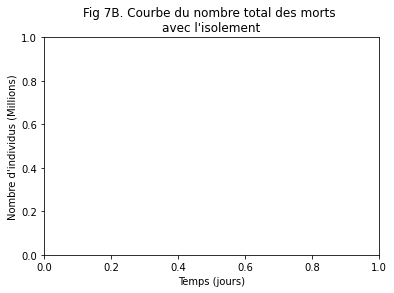

In [46]:
#Evolution du nombre total des morts
plt.title("Fig 7B. Courbe du nombre total des morts \navec l'isolement")
plt.xlabel("Temps (jours)")
plt.ylabel("Nombre d'individus (Millions)")

plt.plot(t,D,ls='solid',linewidth=2,markersize=1,color='red',label='Nombre total des morts')
plt.legend()
plt.grid(linewidth=0.5)
plt.savefig('Figure14.png')
plt.show()
print("Le nombre total des nombres des morts au 40ème jour est ",1000*get_y(D,t,40), " mille morts")